In [69]:
import math
import numpy as np
import matplotlib.pyplot as plt
import Master_Library_1 as ml

# Answer to Q1

In [2]:
def PrintMatrix(l, n):
    for i in range(n):
        print(*l[i])

#Function to check for Symmetric matrix
def SymmetricCheck(l):
    c=0
    for i in range(len(l)):
        for j in range(len(l)):
            if l[i][j]!=l[j][i]:
                c=c+1
    if c!=0:
        return False
    else:
        return True

In [3]:
#Factorises into lower triangular matrix
def Decomposition(l):
    q=[[0 for col in range(len(l))] for row in range(len(l))]      
    for i in range(len(l)):
        for j in range(len(l)):
            if i==j:
                sum=0
                for k in range(i):
                    sum=sum+math.pow(q[k][i],2)
                q[i][j]=math.sqrt(abs(l[i][j]-sum))
            if i<j:
                sum=0
                for k in range(i):
                    sum=sum+q[k][i]*q[k][j]
                q[i][j]=(l[i][j]-sum)/q[i][i]
    return q

def CholForBack(l,U):
    y=[0 for i in range(len(U))]
    x=[0 for i in range(len(U))]
    y[0]=l[0][len(U)]/U[0][0]

    #Solve for y from L.y=b using forward substitution
    for i in range(1,len(U)):
        sum=0
        for j in range(i):
            sum=sum+U[j][i]*y[j]
        y[i]=(l[i][len(U)]-sum)/U[i][i]
    x[len(U)-1]=y[len(U)-1]/U[len(U)-1][len(U)-1]
    #Solve for x from U.x=y using backward substitution
    for i in range(len(U)-2,-1,-1):
        sum=0
        for j in range(len(U)):
            sum=sum+U[i][j]*x[j]
        x[i]=(y[i]-sum)/U[i][i]
    return x

In [4]:
def GaussSeidel(l):
    x_k=[0 for col in range(len(l))]
    x_k1=[0 for col in range(len(l))]
    e=0.000001#initial guess and tolerance
    for i in range(len(l)):
        sum=0
        for j in range(i):
            sum=sum+(l[i][j])*x_k[j]
        x_k[i] = (l[i][(len(l))]-sum)/l[i][i]
    n=0
    while (abs(x_k1[0]-x_k[0]))>e or (abs(x_k1[1]-x_k[1]))>e or (abs(x_k1[2]-x_k[2]))>e or (abs(x_k1[3]-x_k[3]))>e or (abs(x_k1[4]-x_k[4]))>e:
        x_k1[0],x_k1[1],x_k1[2],x_k1[3],x_k1[4]=x_k[0],x_k[1],x_k[2],x_k[3],x_k[4]
        for i in range((len(l))):
            sum1,sum2=0,0
            for j in range(i):
                sum1 = sum1 + (l[i][j])*x_k[j]
            for m in range(i+1,(len(l))):
                sum2 = sum2 + (l[i][m])*x_k[m]
            x_k[i]=(l[i][(len(l))]-sum1-sum2)/l[i][i]
        #print(x_k1)
        n+=1
    return x_k

In [73]:
f=open('inputQ1.txt','r')

l=[[int(num) for num in line.split(' ')] for line in f]
print(" Given augmented matrix:")
PrintMatrix(l,len(l))
#Check for symmetric matrix
if SymmetricCheck(l)==False:
    print("Given matrix is not symmetric.")
else:
    print("Symmetric thus we can execute Cholesky.")
    U=Decomposition(l) 
    a = CholForBack(l,U)
    print("Final Solutions using Cholesky Decomposition:", [math.trunc(x*1000000)/1000000 for x in a])
    print()
a = GaussSeidel(l)
print("Final solutions using Gauss Seidel", [math.trunc(x*10000000)/10000000 for x in a])
f.close()

 Given augmented matrix:
4 -1 0 -1 0 0 2
-1 4 -1 0 -1 0 1
0 -1 4 0 0 -1 2
-1 0 0 4 -1 0 2
0 -1 0 -1 4 -1 1
0 0 -1 0 -1 4 2
Symmetric thus we can execute Cholesky.
Final Solutions using Cholesky Decomposition: [1.0, 0.999999, 1.0, 1.0, 1.0, 1.0]

Final solutions using Gauss Seidel [0.9999997, 0.9999997, 0.9999999, 0.9999998, 0.9999998, 0.9999999]


# Answer to Q2

In [9]:
def gjordan(M,n):
    c,flag=0,0
    for i in range(n):
        if M[i][i]==0:
            c=1
            while (i+c)<n and M[i+c][i]==0:
                c=c+1
            if (i+c)==n:
                flag=1
                break
            j=i
            M[j],M[j+c]=M[j+c],M[j]
        for j in range(n):
            if i!=j:
                m=M[j][i]/M[i][i]
                k=0
                for k in range(n+1):
                    M[j][k]=M[j][k]-m*M[i][k]
    return flag


    
def checkDiagDom(l):
    for i in range(len(l)):        
        sum = 0
        for j in range(len(l)) :
            if i!=j:
                sum+=l[i][j]
        print(l[i][i], sum)
        if l[i][i]>sum:
            continue
        else:
            return False
    return True

def makeDiagDom(l):
    for i in range(len(l)):
        max=l[0][i]
        for j in range(len(l)):
            if l[i][j]>max:
                max=l[i][j]
                c=j
        l[c],l[i]=l[i],l[c]
    return l

def positiveDefCheck(l):
    c=0
    for i in range(4):
        for j in range(4):
            if l[i][j]!=l[j][i]:
                c+=1
    if c!=0:
        print("Not symmetric hence not positive definite.")
    else:
        gj=gjordan(l,len(l))
        print(gj)
        c=0
        for i in range(len(l)):
            if l[i][i]<0:
                c+=1
        if c==0:
            print("positive definite")
        
        else:
            print("Not positive definite")
    print(l)
    
def Reduce(l,n):
    c,flag,m,t=0,0,0,0
    for i in range(n):
        if l[i][i]==0:
            c=1
            while (i+c)<n and l[i+c][i]==0:
                c=c+1
            if (i+c)==n:
                flag=1
                break
            j=i
            l[j],l[j+c]=l[j+c],l[j]
        for j in range(n):
            if i!=j:
                p=l[j][i]/l[i][i]
                k=0
                for k in range(n+1):
                    l[j][k]=l[j][k]-p*l[i][k]
    return flag

In [10]:
def UandL(A):
    u=[[0 for col in range(len(A))] for row in range(len(A))]
    l=[[0 for col in range(len(A))] for row in range(len(A))]
    for i in range(len(A)):
        u[0][i]=A[0][i]
        l[i][i]=1
    for j in range(len(A)):
        for i in range(1,j+1):
            sum=0
            for k in range(i):
                sum=sum+(l[i][k])*(u[k][j])
            u[i][j]=A[i][j]-sum

        for i in range(j,len(A)):
            sum=0
            for k in range(j):
                sum=sum+(l[i][k])*(u[k][j])
            if u[j][j]==0:
                continue
            else:
                l[i][j]=(A[i][j]-sum)/(u[j][j])
    return u,l

In [16]:
def LUForBack(l,U,L):
    y=[0 for i in range(len(L))]
    x=[0 for i in range(len(L))]
    y[0]=l[0][len(l)]

    #Solve for y from L.y=b using forward substitution
    for i in range(1,len(L)):
        sum=0
        for j in range(i):
            sum=sum+L[i][j]*y[j]
        y[i]=(l[i][len(l)]-sum)/L[i][i]
    x[len(L)-1]=y[len(L)-1]/U[len(L)-1][len(L)-1]
    #Solve for x from U.x=y using backward substitution
    for i in range(len(L)-2,-1,-1):
        sum=0
        for j in range(len(L)):
            sum=sum+U[i][j]*x[j]
        x[i]=(y[i]-sum)/U[i][i]
    return(x)

def PrintSolutions(l, n, c):
    if (c == 2):
        print("Infinite Solutions Exists")
    elif (c == 3):
        print("No Solution Exists")

    # Printing the solution by dividing constants by
    # their respective diagonal elements
    else:
        for i in range(n):
            print(l[i][n] / l[i][i], end=" ")

In [17]:
f=open('inputQ2.txt','r')

list=[[int(num) for num in line.split(' ')] for line in f]
print(" Given augmented matrix:")
PrintMatrix(list,len(list))

c=Reduce(list,len(list))
#ud.PrintMatrix(l,len(l))
print("Using Gauss-Jordan:")
PrintSolutions(list,len(list),c)
print()
u,l = UandL(list)
#print("Upper matrix:",u)
#print("Lower matrix:",l)

print("Using LU Decomposition")
print(LUForBack(list,u,l))
f.close()


 Given augmented matrix:
0 4 2 0 1 20
4 0 4 10 1 15
2 5 1 3 13 92
11 3 0 1 2 51
3 2 7 1 0 15
Using Gauss-Jordan:
2.674602051644859 3.7118853908737197 -0.05330739299610952 -0.07442518570923211 5.259073222497347 
Using LU Decomposition
[2.674602051644859, 3.7118853908737197, -0.05330739299610685, -0.07442518570923211, 5.259073222497347]


# Answer to Q3

In [74]:
def conjugate_gradient_solve(a, b, tol, max_iter, x0):
    #initialising
    x = x0.copy()
    
    n = len(b)
    r = b - np.dot(a,x)
    p = r.copy()
    r_dot_r = np.dot(r, r)

    for i in range(max_iter):
        ap = np.dot(a,p)
        alpha = r_dot_r / np.dot(p, ap)
        x += alpha * p
        r -= alpha * ap
        new_r_dot_r = np.dot(r, r)
        beta = new_r_dot_r / r_dot_r
        p = r + beta * p
        r_dot_r = new_r_dot_r
        if r_dot_r < tol:
            return x

In [75]:
tol=1e-4
max_iter=1000

f=open('inputQ3.txt','r')
l=[[float(num) for num in line.split(' ')] for line in f]

a = [line[:6] for line in l]
b = [line[-1:] for line in l]

#convert to numpy array and flatten to 1d array
a = np.array(a)
b = np.array(b)
b = b.flatten()

x = [1,2,3,4,5,6] #guess

Soln = conjugate_gradient_solve(a,b,tol,max_iter,x)
print("Solution of given set of linear equations:", Soln)

a_inv = np.linalg.inv(a)

dotmat = np.dot(a,a_inv)
print("Inverse calculated using numpy function:", dotmat)

print("Returns an identitiy matrix. Thus, inverse is correct")
f.close()

Solution of given set of linear equations: [-0.33661775  0.33212435  1.00023694 -0.6740468  -0.00259971  0.66668626]
Inverse calculated using numpy function: [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  1.00000000e+00 -6.93889390e-17  0.00000000e+00
   0.00000000e+00 -2.77555756e-17]
 [ 4.85722573e-17  9.71445147e-17  1.00000000e+00  0.00000000e+00
   0.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.93889390e-18 -1.38777878e-17 -4.16333634e-17 -2.77555756e-17
   1.00000000e+00  5.55111512e-17]
 [-2.77555756e-17 -5.55111512e-17  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]
Returns an identitiy matrix. Thus, inverse is correct


# Answer to Q4


In [67]:
# Kronecker delta function
def k_delta(i, j):
    if i == j:
        return 1
    else:
        return 0

#building given matrix
def matrix(i, j):
    num = 0.5 * (k_delta(i + 1, j) + k_delta(i - 1, j) - 2 * k_delta(i, j)) - m * m * k_delta(i, j)
    return num

def matrix_vector(v):
    Av = np.zeros_like(v)
    for i in range(N):
        # implementing Periodic boundary conditions
        ip = (i + 1) % N
        im = (i - 1) % N
        for j in range(N):
            jp = (j + 1) % N
            jm = (j - 1) % N
            Av[i, j] = (
                v[ip, j] + v[i, jp] + v[im, j] + v[i, jm] - 2 * v[i, j]) / (m ** 2) + 2 * v[i, j]
    return Av

def conjugate_gradient_inverse():
    #initialising
    x = np.random.rand(N, N)  
    b = np.eye(N)  
    r = b - matrix_vector(x)
    p = r.copy()
    rsold = np.sum(r * r)

    residue = [] 

    for i in range(N ** 2): 
        ap = matrix_vector(p)
        alpha = rsold / np.sum(p * Ap)
        x = x + alpha * p
        r = r - alpha * ap
        rsnew = np.sum(r * r)
        if np.sqrt(rsnew) < tolerance:
            print("Converged in", (i+1), "iterations.")
            break
        p = r + (rsnew / rsold) * p
        rsold = rsnew
        residue.append(np.sqrt(rsnew))

    return x, residue

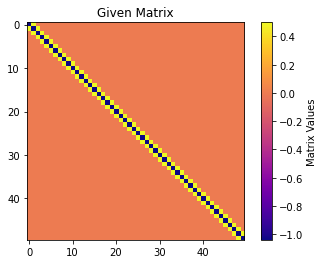

Converged in 412 iterations.
Inverse of given matrix form [[-0.00057046  0.00972618  0.00990759 ... -0.00021489  0.00990759
   0.00972618]
 [ 0.00972618 -0.00057046  0.00972618 ... -0.01011389 -0.00021489
   0.00990759]
 [ 0.00990759  0.00972618 -0.00057046 ... -0.00949444 -0.01011389
  -0.00021489]
 ...
 [-0.00021489 -0.01011389 -0.00949444 ... -0.00057046  0.00972618
   0.00990759]
 [ 0.00990759 -0.00021489 -0.01011389 ...  0.00972618 -0.00057046
   0.00972618]
 [ 0.00972618  0.00990759 -0.00021489 ...  0.00990759  0.00972618
  -0.00057046]]


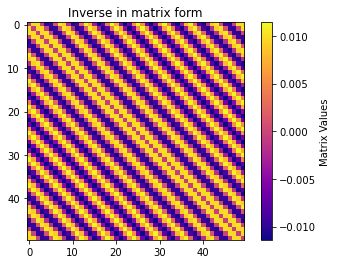

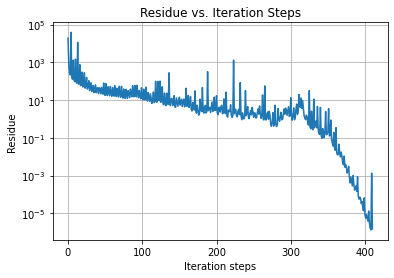

In [79]:
# Set parameters and convergence criteria
N = 50  # Size of the matrix
tolerance = 1e-6 l
m= 0.2

#Plot given matrix
test = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        test[i][j] = matrix(i,j)

plt.imshow(test, cmap='plasma') 
plt.title("Given Matrix")
plt.colorbar(label='Matrix Values')  
plt.show()

inverse, residue = conjugate_gradient_inverse()

print("Inverse of given matrix form", inverse)

# Plot the inverse matrix
plt.imshow(inverse, cmap='plasma')
plt.title('Inverse in matrix form')
plt.colorbar(label='Matrix Values')
plt.show()

#Plotting the residue vs iteration steps
plt.plot(residue)
plt.xlabel('Iteration steps')
plt.ylabel('Residue')
plt.title('Residue vs. Iteration Steps')
plt.yscale('log')
plt.grid()
plt.show()
